In [29]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image

dataset_path = "/media/vision/Data0/DataSets/Image_Matching_Challenge_2021/imc-2021-test-public-pragueparks/pragueparks/pond/"


In [30]:
img1 = Image.open(dataset_path + "IMG_9622.MOV_frame000109.jpg")
img2 = Image.open(dataset_path + "IMG_9622.MOV_frame000123.jpg")

In [31]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # resize image to 224x224
    transforms.ToTensor(),  # convert image to Tensor
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # normalize image
])

img1_tensor = transform(img1).unsqueeze(0)
img2_tensor = transform(img2).unsqueeze(0)

img1_gray = torchvision.transforms.Grayscale(num_output_channels=1)(img1_tensor)

print(img1_gray.shape)
print(img2_tensor.shape)

torch.Size([1, 1, 224, 224])
torch.Size([1, 3, 224, 224])


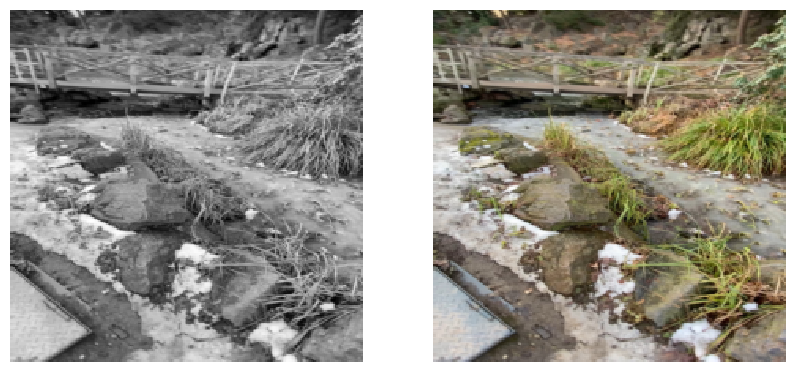

In [32]:
import matplotlib.pyplot as plt

# create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# display first image in first subplot
axs[0].imshow(img1_gray.squeeze(), cmap='gray')
axs[0].axis('off')

# display second image in second subplot
axs[1].imshow(img1_tensor.squeeze().permute(1, 2, 0))
axs[1].axis('off')

plt.show()

In [33]:
img1_octave1 = torch.nn.functional.interpolate(img1_gray, scale_factor=2, mode='bilinear', align_corners=False)
img1_octave2 = torch.nn.functional.interpolate(img1_octave1, scale_factor=0.5, mode='bilinear', align_corners=False)
img1_octave3 = torch.nn.functional.interpolate(img1_octave2, scale_factor=0.5, mode='bilinear', align_corners=False)
img1_octave4 = torch.nn.functional.interpolate(img1_octave3, scale_factor=0.5, mode='bilinear', align_corners=False)

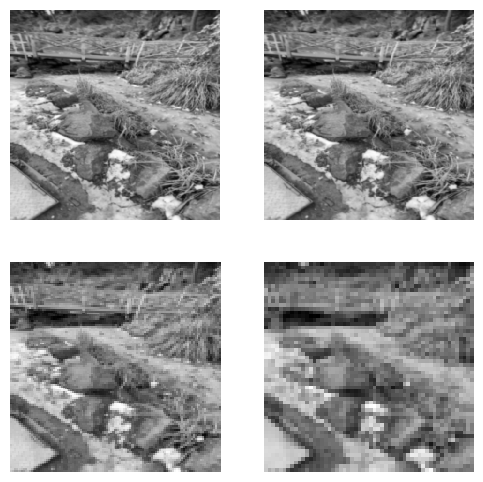

In [46]:
# create figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

# display first image in first subplot
axs[0,0].imshow(img1_octave1[0,0,:,:], cmap='gray')
# axs[0,0].axis([0,500,500,0])
axs[0,0].axis('off')

# display second image in second subplot
axs[0,1].imshow(img1_octave2[0,0,:,:], cmap='gray')
# axs[0,1].axis([0,500,500,0])
axs[0,1].axis('off')

axs[1,0].imshow(img1_octave3[0,0,:,:], cmap='gray')
# axs[1,0].axis([0,500,500,0])
axs[1,0].axis('off')

axs[1,1].imshow(img1_octave4[0,0,:,:], cmap='gray')
# axs[1,1].axis([0,500,500,0])
axs[1,1].axis('off')

plt.show()

In [55]:
import math
import torchvision
import torch.nn.functional as F

k = math.sqrt(2)

img1_octave1_1 = torchvision.transforms.GaussianBlur(kernel_size = (5, 5), sigma=(1/k, 1/k))(img1_octave2)
img1_octave1_2 = torchvision.transforms.GaussianBlur(kernel_size = (5, 5), sigma=(1, 1))(img1_octave2)
img1_octave1_3 = torchvision.transforms.GaussianBlur(kernel_size = (5, 5), sigma=(k, k))(img1_octave2)
img1_octave1_4 = torchvision.transforms.GaussianBlur(kernel_size = (5, 5), sigma=(k*k, k*k))(img1_octave2)
img1_octave1_5 = torchvision.transforms.GaussianBlur(kernel_size = (5, 5), sigma=(k*k*k, k*k*k))(img1_octave2)

imgd_1 = img1_octave1_1-img1_octave1_2
imgd_2 = img1_octave1_2-img1_octave1_3
imgd_3 = img1_octave1_3-img1_octave1_4
imgd_4 = img1_octave1_4-img1_octave1_5

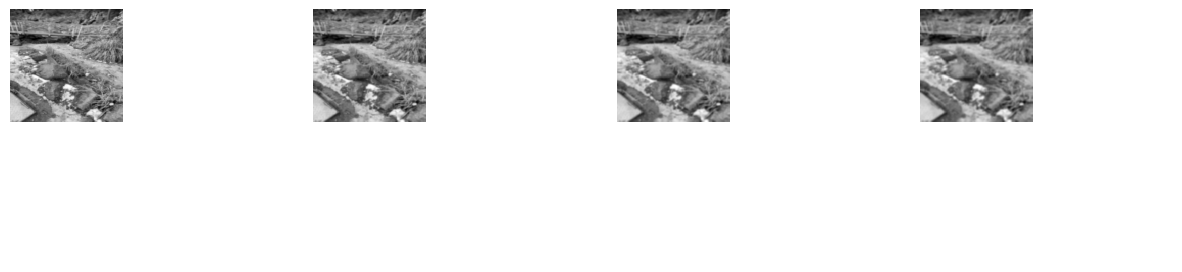

In [56]:
# create figure and subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 20))

# display first image in first subplot
axs[0].imshow(img1_octave1_1[0,0,:,:], cmap='gray')
axs[0].axis([0,500,500,0])
axs[0].axis('off')

# display second image in second subplot
axs[1].imshow(img1_octave1_2[0,0,:,:], cmap='gray')
axs[1].axis([0,500,500,0])
axs[1].axis('off')

axs[2].imshow(img1_octave1_3[0,0,:,:], cmap='gray')
axs[2].axis([0,500,500,0])
axs[2].axis('off')

axs[3].imshow(img1_octave1_4[0,0,:,:], cmap='gray')
axs[3].axis([0,500,500,0])
axs[3].axis('off')

plt.show()

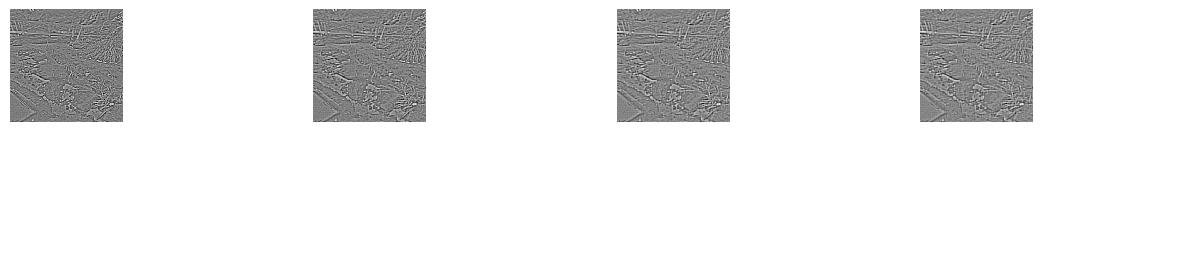

In [57]:
# create figure and subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 20))

# display first image in first subplot
axs[0].imshow(imgd_1[0,0,:,:], cmap='gray')
axs[0].axis([0,500,500,0])
axs[0].axis('off')

# display second image in second subplot
axs[1].imshow(imgd_2[0,0,:,:], cmap='gray')
axs[1].axis([0,500,500,0])
axs[1].axis('off')

axs[2].imshow(imgd_3[0,0,:,:], cmap='gray')
axs[2].axis([0,500,500,0])
axs[2].axis('off')

axs[3].imshow(imgd_4[0,0,:,:], cmap='gray')
axs[3].axis([0,500,500,0])
axs[3].axis('off')

plt.show()

In [63]:
for i in range(22):
    for j in range(446):


tensor(0.0090)


In [68]:
k_img1 = imgd_4.squeeze()
for i in range(222):
    for j in range(222):
        if (max(imgd_2.squeeze()[i:i+2,j:j+2].max(), imgd_1.squeeze()[i:i+2,j:j+2].max(), imgd_3.squeeze()[i:i+2,j:j+2].max()) == imgd_2.squeeze()[i+1,j+1]):
            k_img1[i+1,j+1] = 1
        else:
            k_img1[i+1,j+1] = 0

k_img2 = imgd_4.squeeze()
for i in range(222):
    for j in range(222):
        if (max(imgd_3.squeeze()[i:i+2,j:j+2].max(), imgd_2.squeeze()[i:i+2,j:j+2].max(), imgd_4.squeeze()[i:i+2,j:j+2].max()) == imgd_3.squeeze()[i+1,j+1]):
            k_img2[i+1,j+1] = 1
        else:
            k_img2[i+1,j+1] = 0

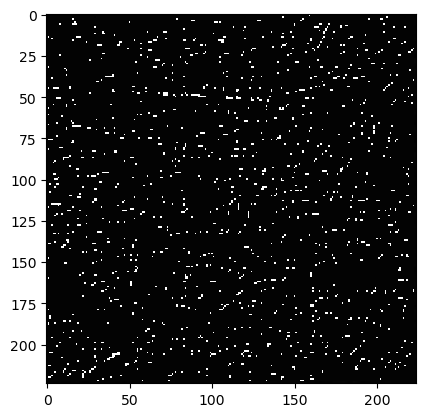

In [69]:
# display first image in first subplot
plt.imshow(k_img1, cmap='gray')
plt.show()